In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [3]:
csv_path = Path(r"C:\Users\abc\Desktop\Airbnb project\archive (3)\listings.csv")
csv_path2 = Path(r"C:\Users\abc\Desktop\Airbnb project\archive (3)\calendar.csv")

In [4]:
listings_df = pd.read_csv(csv_path )
listings_df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\abc\\Desktop\\Airbnb project\\archive (3)\\listings.csv'

# Data Cleaning

In [ ]:
# Reduce the columns which are needed
listings_requiredcolumns = listings_df[["id","name","host_id","host_name","neighbourhood_cleansed","latitude","longitude","property_type","accommodates",
                                       "room_type","bathrooms_text","bedrooms","beds","amenities","price","availability_365",
                                        "number_of_reviews","review_scores_rating"]] 
listings_requiredcolumns

In [ ]:
#Checking to see if all columns has correct datatype
listings_requiredcolumns.dtypes

In [ ]:
#checking the null values in Dataset
listings_requiredcolumns.isnull()

In [ ]:
# looking for missing values
listings_requiredcolumns.count()

In [ ]:
# Dropping the null rows
Airbnb_listings_df = listings_requiredcolumns.dropna(how ='any')
Airbnb_listings_df.count()

In [10]:
#Renaming the columns
Airbnb_listings_final_df = Airbnb_listings_df.rename(columns={"id":"listing_id",
                                                              "neighbourhood_cleansed":"neighbourhood",
                                                              "name":"property_name"})
Airbnb_listings_final_df 

,listing_id,property_name,host_id,host_name,neighbourhood,latitude,longitude,property_type,accommodates,room_type,bathrooms_text,bedrooms,beds,amenities,price,availability_365,number_of_reviews,review_scores_rating
0,1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64617,-79.42451,Entire residential home,10,Entire home/apt,3 baths,5.0,7.0,"[""Smoke alarm"", ""Dryer"", ""Indoor fireplace"", ""...",$469.00,0,7,5.00
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,Waterfront Communities-The Island,43.64105,-79.37628,Private room in rental unit,2,Private room,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Elevator"", ""Pool"", ""Gym"", ""He...",$94.00,365,169,4.84
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,Briar Hill-Belgravia,43.69602,-79.45468,Private room in residential home,3,Private room,1 shared bath,1.0,1.0,"[""Bed linens"", ""Keypad"", ""Hot water"", ""Extra p...",$72.00,365,217,4.75
5,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,Waterfront Communities-The Island,43.64151,-79.37643,Entire rental unit,2,Entire home/apt,1.5 baths,1.0,2.0,"[""Smoke alarm"", ""Elevator"", ""Pool"", ""Gym"", ""Ki...",$125.00,365,1,5.00
6,40456,Downtown- King Size Bed and Parking,174063,Denis,South Parkdale,43.63532,-79.44049,Entire residential home,5,Entire home/apt,1 bath,2.0,2.0,"[""Hot water"", ""Coffee maker"", ""Heating"", ""Oven...",$100.00,190,113,4.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14934,51285467,1 room/2 bed unit near the lake in Old Toronto,68920217,Jacob,Long Branch,43.59077,-79.53081,Entire rental unit,4,Entire home/apt,1 bath,1.0,2.0,"[""Long term stays allowed""]",$165.00,365,1,2.00
14947,51306728,1-Bedroom Condo in the Heart of Downtown Toronto,14248365,Jay,Waterfront Communities-The Island,43.64461,-79.39189,Entire condominium (condo),2,Entire home/apt,1 bath,1.0,0.0,"[""Smoke alarm"", ""Pool"", ""Pool table"", ""Kitchen...",$200.00,353,1,5.00
14960,51325342,Cottage feel in the heart of the city,152725249,Aina,Broadview North,43.68493,-79.35119,Private room in residential home,1,Private room,1 shared bath,1.0,1.0,"[""Bed linens"", ""Hot water kettle"", ""Hot water""...",$47.00,0,2,5.00
14963,51331254,Cottage in the City - breakfast Included!,244309863,Chamalee,Parkwoods-Donalda,43.76491,-79.32371,Entire guest suite,6,Entire home/apt,1 bath,1.0,2.0,"[""Bed linens"", ""Hot water kettle"", ""Hot water""...",$95.00,357,2,5.00


In [11]:
Airbnb_listings_df['price']

0        $469.00
1         $94.00
2         $72.00
5        $125.00
6        $100.00
          ...   
14934    $165.00
14947    $200.00
14960     $47.00
14963     $95.00
14994    $194.00
Name: price, Length: 10687, dtype: object

In [12]:
Airbnb_listings_df = Airbnb_listings_df[Airbnb_listings_df['price'].notnull()].copy()
Airbnb_listings_df['price'] = Airbnb_listings_df['price'].apply(str).str.replace(',', '' , regex = True).apply(str).str.replace('$', '' , regex = True).astype(float)

In [13]:
Airbnb_listings_df.dtypes

id                          int64
name                       object
host_id                     int64
host_name                  object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
accommodates                int64
room_type                  object
bathrooms_text             object
bedrooms                  float64
beds                      float64
amenities                  object
price                     float64
availability_365            int64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

# Visualization

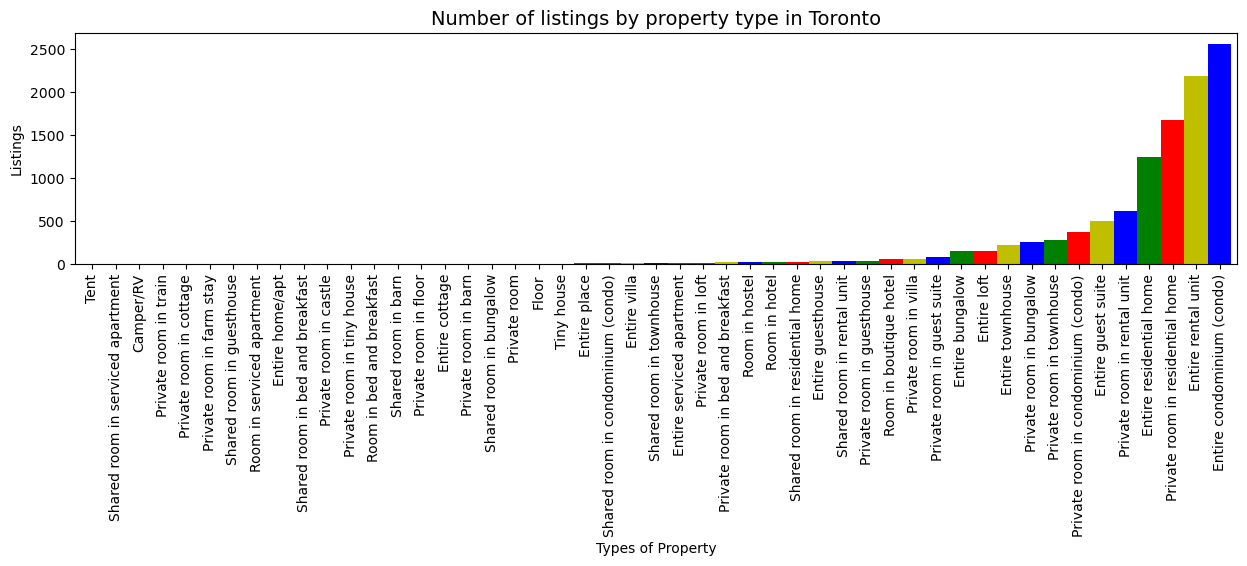

In [162]:
# Q1 Types of properties available
type_prop = Airbnb_listings_df['property_type'].value_counts().sort_values(ascending=True)
type_prop.plot.bar(figsize =(15,3), width=1, color=['b','g','r','y'])
                                            
plt.xlabel("Types of Property")
plt.ylabel("Listings")
plt.title("Number of listings by property type in Toronto", fontsize=14)

plt.show()

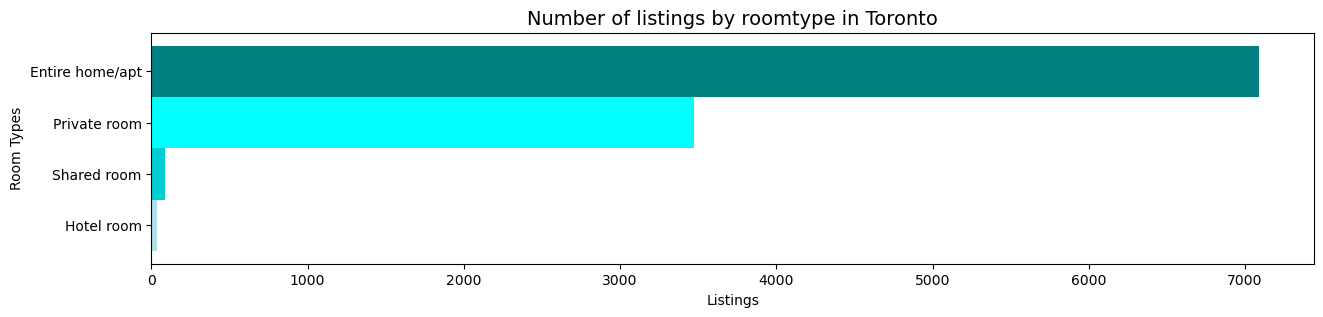

In [164]:
# Q1 Types of room types available
type_prop = Airbnb_listings_df['room_type'].value_counts().sort_values(ascending=True)
type_prop.plot.barh(figsize =(15,3), width=1, color=['powderblue','darkturquoise','aqua','teal'])
                                         
plt.ylabel("Room Types")
plt.xlabel("Listings")
plt.title("Number of listings by roomtype in Toronto", fontsize=14)
plt.show()


In [6]:
# Average rental Price per month

listing_calendar = pd.read_csv(csv_path2)
listing_calendar.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\abc\\Desktop\\Airbnb project\\archive (3)\\calendar.csv'

In [34]:
listings_calendarcolumns = listing_calendar[["listing_id","date","price","minimum_nights","maximum_nights"]] 
listings_calendarcolumns

,listing_id,date,price,minimum_nights,maximum_nights
0,732562,2021-08-07,$98.00,30.0,1125.0
1,224775,2021-08-06,$80.00,28.0,162.0
2,224775,2021-08-07,$80.00,28.0,162.0
3,224775,2021-08-08,$80.00,28.0,162.0
4,224775,2021-08-09,$80.00,28.0,162.0
...,...,...,...,...,...
5505679,51432347,2022-08-01,$400.00,3.0,1125.0
5505680,51432347,2022-08-02,$400.00,3.0,1125.0
5505681,51432347,2022-08-03,$400.00,3.0,1125.0
5505682,51432347,2022-08-04,$400.00,3.0,1125.0


In [59]:
listings_calendarcolumns = listings_calendarcolumns[listings_calendarcolumns['price'].notnull()].copy()
listings_calendarcolumns['price'] = listings_calendarcolumns['price'].apply(str).str.replace(',', '' , regex = True).apply(str).str.replace('$', '' , regex = True).astype(float)
listings_calendarcolumns.dtypes

listing_id          int64
date               object
price             float64
minimum_nights    float64
maximum_nights    float64
dtype: object

In [43]:
df_calendar = listings_calendarcolumns.groupby('date')[["price"]].mean()
df_calendar['mean'] = listings_calendarcolumns.groupby('date')[["price"]].mean()

#SET DATE AS INDEX
df_calendar2 = listings_calendarcolumns.set_index("date")
df_calendar2.index = pd.to_datetime(df_calendar2.index)

In [45]:
df_calendar2

,price
date,
2021-08-31,158.727452
2021-09-30,159.233090
2021-10-31,158.987435
2021-11-30,159.532315
2021-12-31,162.464723
2022-01-31,166.485800
2022-02-28,166.815885
2022-03-31,167.288885
2022-04-30,168.402141


In [8]:
df_calendar2.plot.line(marker = "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title("Average Prices by Month")
plt.show()

NameError: name 'df_calendar2' is not defined

In [88]:
df_price_property = Airbnb_listings_df.groupby('property_type')
df_avgpropertyprice = df_price_property['price'].mean()
df_avgpropertyprice

property_type
Camper/RV                               188.000000
Entire bungalow                         247.939597
Entire condominium (condo)              206.031299
Entire cottage                          165.000000
Entire guest suite                      106.974206
Entire guesthouse                       129.468750
Entire home/apt                         129.000000
Entire loft                             260.955128
Entire place                            152.333333
Entire rental unit                      143.525160
Entire residential home                 230.763242
Entire serviced apartment               384.333333
Entire townhouse                        226.082949
Entire villa                           1037.800000
Floor                                    55.666667
Private room                             51.666667
Private room in barn                    123.000000
Private room in bed and breakfast        95.350000
Private room in bungalow                 54.640000
Private room in c

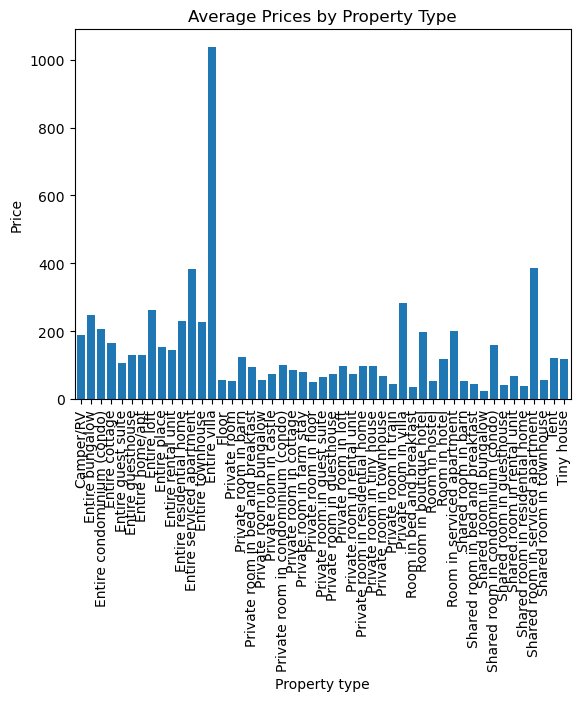

In [167]:
average_price = df_avgprice.plot(kind="bar", title="Average Prices by Property Type" , width = 0.8)
average_price.set_xlabel("Property type")
average_price.set_ylabel("Price")

plt.show()


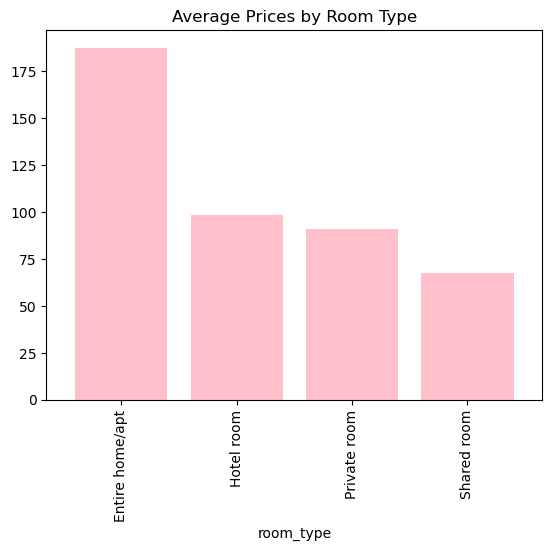

In [100]:
average_roomprice = df_avgroomprice.plot(kind="bar", title="Average Prices by Room Type" , width = 0.8 ,color = 'pink')
average_price.set_xlabel("Property type")
average_price.set_ylabel("Price")

plt.show()

# Revenue based on Room types in Toronto

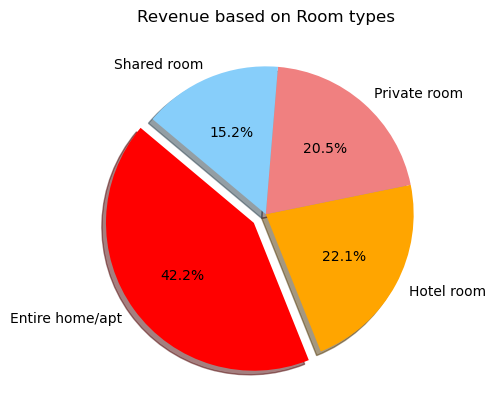

In [168]:
df_price_room = Airbnb_listings_df.groupby('room_type')
df_avgroomprice = df_price_room['price'].mean()
df_avgroomprice

labels = ["Entire home/apt", "Hotel room ", "Private room ", "Shared room" ]
colors = ["red", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0)

plt.pie(df_avgroomprice, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title ("Revenue based on Room types")

plt.show()


# Correlation of Price with other variables 

In [118]:
# Generating the corealtion matrix and finding the strongest positive and negetive corelation 

bnb_corr = Airbnb_listings_df.corr()
bnb_corr.unstack().sort_values()


C:\Users\abc\AppData\Local\Temp\ipykernel_12076\358665183.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bnb_corr = Airbnb_listings_df.corr()


id                    number_of_reviews      -0.288964
number_of_reviews     id                     -0.288964
                      host_id                -0.134953
host_id               number_of_reviews      -0.134953
number_of_reviews     latitude               -0.123499
                                                ...   
longitude             longitude               1.000000
latitude              latitude                1.000000
host_id               host_id                 1.000000
number_of_reviews     number_of_reviews       1.000000
review_scores_rating  review_scores_rating    1.000000
Length: 121, dtype: float64

In [158]:
# Checking the corelation between price and no. of bedrooms

price = Airbnb_listings_df ['price']
Bedrooms = Airbnb_listings_df ['bedrooms']
corr = st.pearsonr(price,price)
corr
#print (f"The correlation betweenprice and No. of Accomodates is {correlation}")

PearsonRResult(statistic=1.0, pvalue=0.0)

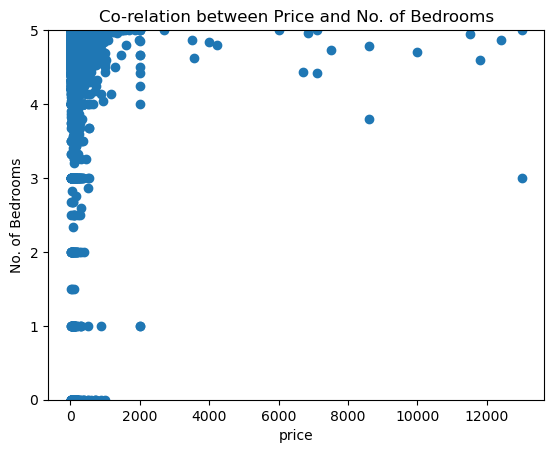

In [135]:
plt.scatter(price ,rate)
plt.xlabel("price")
plt.ylim(0,5)
plt.ylabel("No. of Bedrooms")
plt.title("Co-relation between Price and No. of Bedrooms")
plt.show()

    
#As we calculated the corealtion between price and no of bedrooms it shows the r value is 0.17 that means there is no relation 
#which is also clear in the scatter plot 

The correlation betweenprice and No. of Accomodates is 0.2


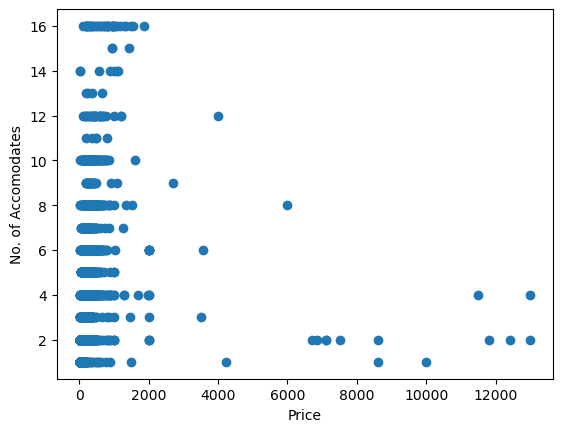

In [161]:
price = Airbnb_listings_df ['price']
Accomodates = Airbnb_listings_df ['accommodates']
correlation = st.pearsonr(price , Accomodates)
print (f"The correlation betweenprice and No. of Accomodates is {round(correlation[0],2)}")
plt.scatter(price,Accomodates)
plt.xlabel("Price")
plt.ylabel("No. of Accomodates")
plt.show()
#As we calculated the correlation between price and no of accommodates it shows the r value is 0.2 that means there is no relation 
#which is also clear in the scatter plot 


# Central Tendency and Finding the outliers

In [139]:
Airbnb_listings_df.describe().price
# As we can see from the table the average price of an airbnb irrespective of the property type is $155

count    10687.000000
mean       155.018059
std        379.602692
min         13.000000
25%         65.000000
50%        101.000000
75%        170.000000
max      13000.000000
Name: price, dtype: float64

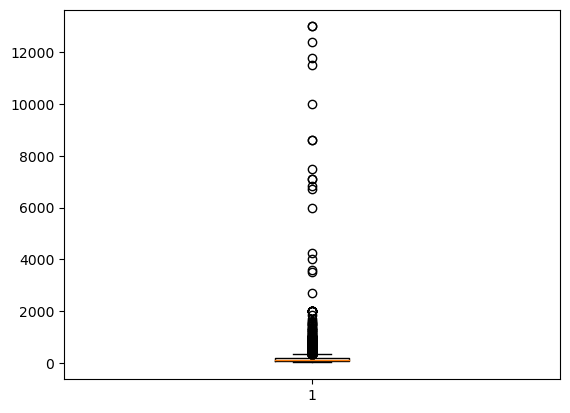

In [140]:
price= Airbnb_listings_df ['price']
plt.boxplot(price)
plt.show()
#As mentioned, the mean price is $155 irrespective of the property type but there is a huge variance.
#The box and whisker shows that there are many outliers present in the data.
